<a href="https://colab.research.google.com/github/moonlightwatch/ColaboratoryBackup/blob/main/mnist_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.listdir("./data/MyDrive/mnist_data")

['mnist_train.csv', 'mnist_test.csv']

In [ ]:
import pandas
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [ ]:
class Classifier(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 200), nn.LeakyReLU(), nn.LayerNorm(200), nn.Linear(200, 10), nn.LeakyReLU()
        )
        if torch.has_cuda:
            self.model = self.model

        self.loss_function = nn.MSELoss()
        # self.loss_function = nn.BCELoss()

        self.optimiser = torch.optim.Adam(self.parameters())

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        if torch.has_cuda:
            inputs = inputs
            targets = targets
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print(f"counter = {self.counter}")

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=["loss"])
        df.plot(
            ylim=(0, 1.0),
            figsize=(16, 8),
            alpha=0.1,
            marker=".",
            grid=True,
            yticks=(0, 0.25, 0.5),
        )

In [ ]:
class MnistDataset(Dataset):
    def __init__(self, csv_file) -> None:
        self.data_df = pandas.read_csv(csv_file, header=None)

    def __len__(self) -> int:
        return len(self.data_df)

    def __getitem__(self, index):
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1.0
        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0
        return (
            label,
            image_values,
            target,
        )


In [ ]:
train_dataset = MnistDataset("./data/MyDrive/mnist_data/mnist_train.csv")
test_dataset = MnistDataset("./data/MyDrive/mnist_data/mnist_test.csv")

In [ ]:
def test_model(c:Classifier):
    count = 0
    score = 0
    for l, i, t in test_dataset:
        count += 1
        o = c.forward(i)
        if o.detach().numpy().argmax() == l:
            score += 1
    print(f"{score}/{count} = {(score/count)*100}%")

c = Classifier()
epochs = 10
for i in range(epochs):
    print(f"training epoch {i+1} of {epochs}")
    for l, data, target in train_dataset:
        c.train(data, target)
    torch.save(c, f"./data/MyDrive/epochs_{i+1}_mnist.pkl")
    test_model(c)

training epoch 1 of 10
counter = 10000
counter = 20000
counter = 30000
counter = 40000
counter = 50000
counter = 60000
9642/10000 = 96.41999999999999%
training epoch 2 of 10
counter = 70000
counter = 80000
counter = 90000
counter = 100000
counter = 110000
counter = 120000
9714/10000 = 97.14%
training epoch 3 of 10
counter = 130000
counter = 140000
counter = 150000
counter = 160000
counter = 170000
counter = 180000
9729/10000 = 97.28999999999999%
training epoch 4 of 10
counter = 190000
counter = 200000
counter = 210000
counter = 220000
counter = 230000
counter = 240000
9742/10000 = 97.42%
training epoch 5 of 10
counter = 250000
counter = 260000
counter = 270000
counter = 280000
counter = 290000
counter = 300000
9740/10000 = 97.39999999999999%
training epoch 6 of 10
counter = 310000
counter = 320000
counter = 330000
counter = 340000
counter = 350000
counter = 360000
9745/10000 = 97.45%
training epoch 7 of 10
counter = 370000
counter = 380000
counter = 390000
counter = 400000
counter = 41

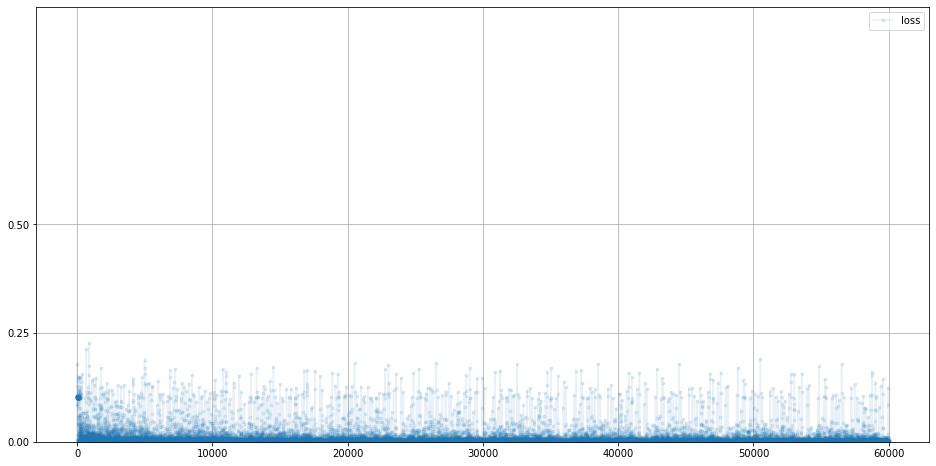

In [ ]:
c.plot_progress()